# Time Series Analysis

In [1]:
import pandas as pd 
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df = pd.read_csv('UberEdited.csv')
df.head()

,Unnamed: 0,index,Unumber,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,distance_range
0,0,129546,4264204,2013-10-11 20:42:00.000000209,13.50,2013-10-11 20:42:00 UTC,-73.968367,40.755280,-74.000925,40.731782,1,3.705146,4.0
1,1,157708,16914374,2009-05-22 22:56:00.000000207,28.25,2009-05-22 22:56:00 UTC,-73.871200,40.773960,-73.996203,40.759870,1,13.958072,10000.0
2,2,146825,274789,2011-02-28 06:56:44.0000002,6.90,2011-02-28 06:56:44 UTC,-73.996791,40.737605,-73.977832,40.763559,1,2.261968,3.0
3,3,192482,11942062,2015-01-04 17:04:31.0000004,39.33,2015-01-04 17:04:31 UTC,-73.873100,40.774040,-73.985306,40.732552,1,12.588475,10000.0
4,4,187756,42996243,2014-04-27 12:59:00.000000182,14.50,2014-04-27 12:59:00 UTC,-73.956453,40.771052,-73.991773,40.749097,1,3.999675,4.0


In [3]:
df['key'] = pd.to_datetime(df['key'])
df = df[["key","fare_amount"]]

In [4]:
train_original = df.sample(frac=0.67, random_state=25)
test_original = df.drop(train_original.index)
test_original = test_original.drop(columns="fare_amount")
train = train_original.copy()
test = test_original.copy()
print(f"No. of training examples: {train_original.shape[0]}")
print(f"No. of testing examples: {test_original.shape[0]}")

No. of training examples: 91885
No. of testing examples: 45257


In [5]:
for i in (train, test, test_original, train_original):
    i['year']=i.key.dt.year 
    i['month']=i.key.dt.month 
    i['day']=i.key.dt.day    
    i['Hour']=i.key.dt.hour

In [6]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
temp2 = train['key'].apply(applyer) 
train['weekend']=temp2

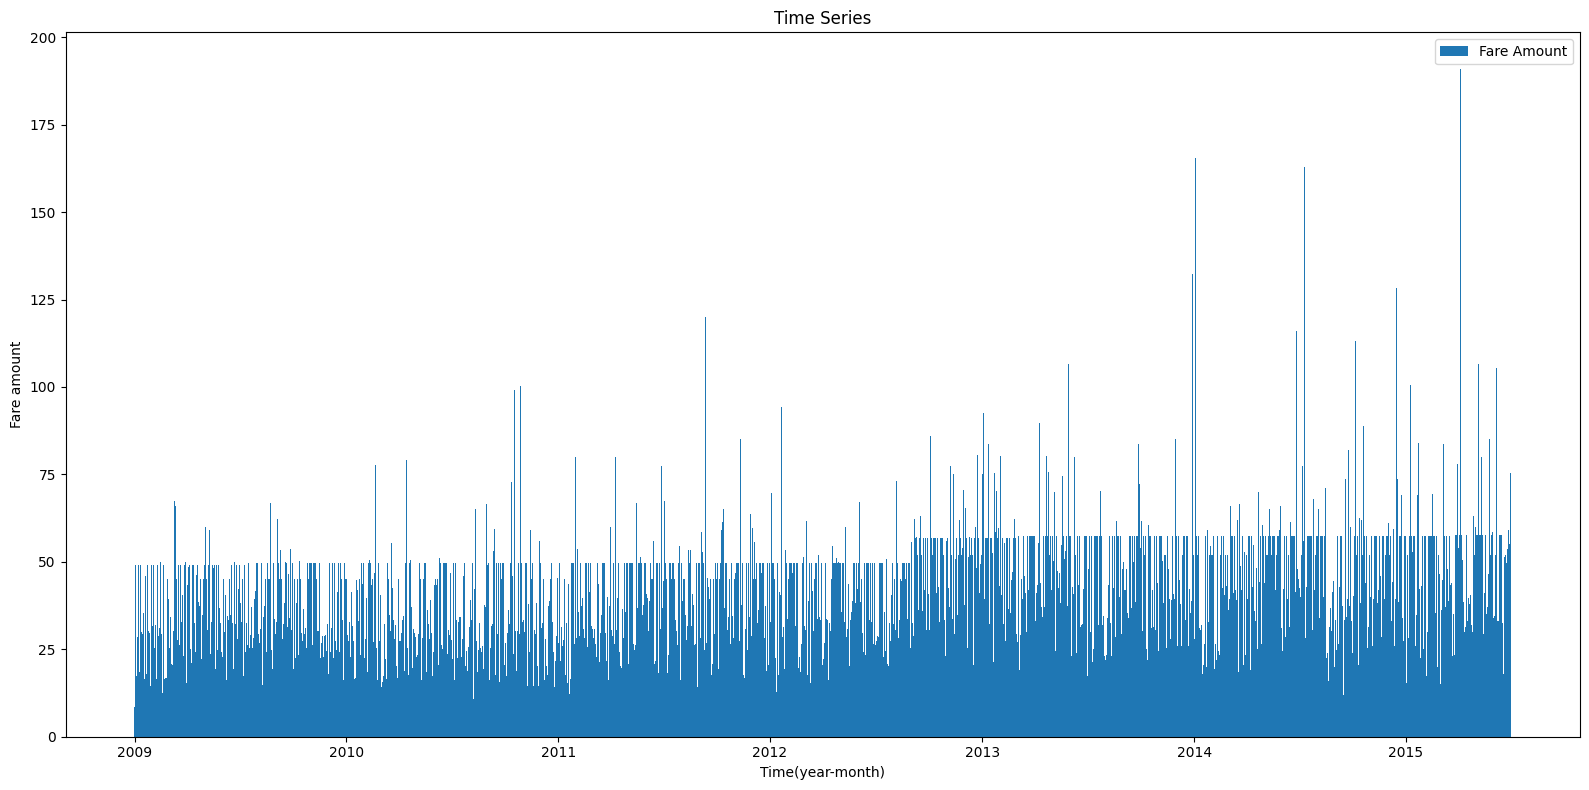

In [7]:
train.index = train['key'] 
# df = train.drop(columns="key")
# ts = df['fare_amount']
plt.figure(figsize=(16,8)) 
plt.bar(train['key'],train['fare_amount'], label='Fare Amount') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Fare amount") 
plt.legend(loc='best')
plt.tight_layout()
# train

In [8]:
year_uber=X_train.groupby(['year'])['year'].size()
sns.barplot(year_uber.index, year_uber.values)

NameError: name 'X_train' is not defined

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='month'>

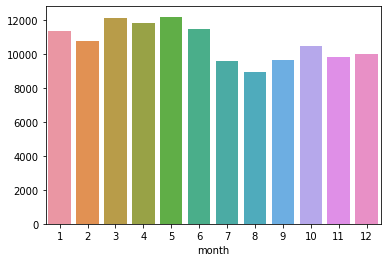

In [ ]:
year_uber=X_train.groupby(['month'])['month'].size()
sns.barplot(year_uber.index, year_uber.values)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='weekday'>

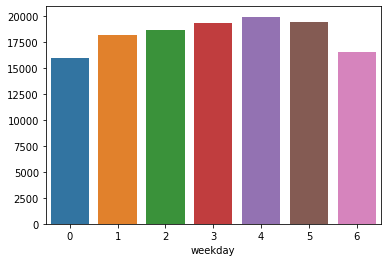

In [ ]:
year_uber=X_train.groupby(['weekday'])['weekday'].size()
sns.barplot(year_uber.index, year_uber.values)

<AxesSubplot:xlabel='weekday', ylabel='fare_amount'>

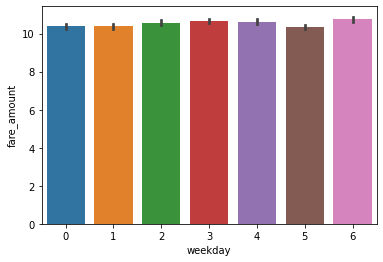

In [ ]:
sns.barplot(data=X_train, x="weekday", y="fare_amount")


<AxesSubplot:xlabel='hour', ylabel='fare_amount'>

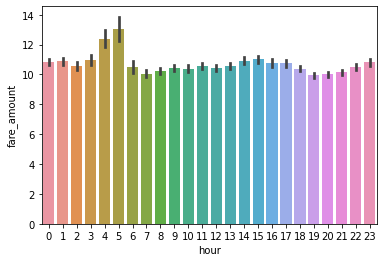

In [ ]:
sns.barplot(data=X_train, x="hour", y="fare_amount") 

<AxesSubplot:xlabel='hour', ylabel='distance'>

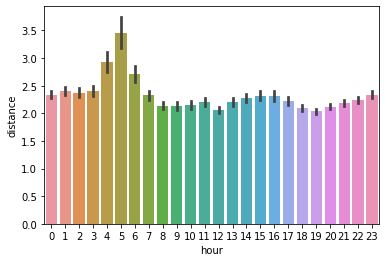

In [ ]:
sns.barplot(data=X_train, x="hour", y="distance")

<AxesSubplot:xlabel='weekday', ylabel='distance'>

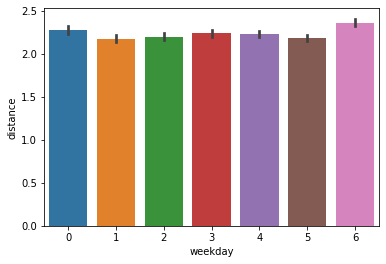

In [ ]:
sns.barplot(data=X_train, x="weekday", y="distance")